<a href="https://colab.research.google.com/github/spexdj/Data-Science-III-NLP-Deep-Learning-aplicado-a-Ciencia-de-Datos/blob/main/ProyectoFinal_DataScienceIII_HernanLicastro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 1. Descripción del Problema de Negocio
##Problema:
En una ciudad tan competitiva y diversa como Atlanta, los dueños de restaurantes enfrentan el desafío de comprender cómo perciben los clientes sus servicios y productos a partir de las reseñas en línea. Sin un análisis adecuado del contenido textual de las opiniones, resulta difícil identificar patrones de satisfacción o insatisfacción que podrían guiar decisiones estratégicas, como mejoras en la atención, cambios de menú, precios o decoración.

#🎯 2. Objetivo General
Analizar las reseñas de clientes de restaurantes en Atlanta mediante técnicas de procesamiento de lenguaje natural (NLP), con el fin de detectar patrones en los comentarios, identificar sentimientos predominantes y extraer información clave que pueda ser útil para la toma de decisiones en la industria gastronómica local.

#📚 3. Origen de los Datos
Los datos fueron obtenidos desde la plataforma Kaggle: https://www.kaggle.com/datasets/grohith/atlanta-restaurant-reviews

#📊 4. Definición de Variables
Estas son las variables más relevantes del dataset:

Descripción

*   ID: Número de review
*   nombre_restaurant: Nombre del restaurante
*   categoria_restaurant:	Categorías de los restaurants
*   web_restaurant:	Sitio web de los restaurants
*   url_google:	Link de google maps de los restaurants
*   Longitud:	Dato de Longitud del restaurant
*   Latitud: Dato de la Latitud del restaurant
*   puntaje: Puntaje del review del restaurant
*   texto_review:	Texto de la reseña


#🧪 5. Cargar datos y procesamiento de texto (NLP paso a paso)

In [ ]:
!pip install openpyxl nltk wordcloud textblob

# Importación de librerías
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from nltk.util import ngrams
from textblob import TextBlob

# Descarga de recursos necesarios de NLTK
nltk.download('punkt')        # Tokenización
nltk.download('stopwords')    # Palabras vacías (stopwords)
nltk.download('wordnet')      # Lematización

# Lectura del archivo Excel desde GitHub (REVISAR: usar 'raw' en la URL)
url = "https://github.com/spexdj/Data-Science-III-NLP-Deep-Learning-aplicado-a-Ciencia-de-Datos/raw/main/Dataset_Atlanta_Restaurants_Reviews.xlsx"
df = pd.read_excel(url)

# Mostrar nombres de columnas y primeras filas para verificar
print("Columnas del dataset:")
print(df.columns)
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Columnas del dataset:
Index(['ID', 'nombre_restaurant', 'categoria_restaurant', 'web_restaurant',
       'url_google', 'longitud', 'latitud', 'puntaje', 'texto_review'],
      dtype='object')


,ID,nombre_restaurant,categoria_restaurant,web_restaurant,url_google,longitud,latitud,puntaje,texto_review
0,1,The Optimist,Seafood restaurant,https://www.theoptimistrestaurant.com/,https://www.google.com/maps/place/The+Optimist/,33.779814,-84.410451,5,"One word amazing!! The red fish, halibut, fr..."
1,2,The Optimist,Seafood restaurant,https://www.theoptimistrestaurant.com/,https://www.google.com/maps/place/The+Optimist/,33.779814,-84.410451,5,First time here and the food is great and the ...
2,3,The Optimist,Seafood restaurant,https://www.theoptimistrestaurant.com/,https://www.google.com/maps/place/The+Optimist/,33.779814,-84.410451,5,I recently had the pleasure of dining at Optim...
3,4,The Optimist,Seafood restaurant,https://www.theoptimistrestaurant.com/,https://www.google.com/maps/place/The+Optimist/,33.779814,-84.410451,5,Beautiful atmosphere and delicious food. All o...
4,5,The Optimist,Seafood restaurant,https://www.theoptimistrestaurant.com/,https://www.google.com/maps/place/The+Optimist/,33.779814,-84.410451,5,We had a wonderful dinner at the Optimist. Our...


#6. Limpieza y preprocesamiento del texto

In [ ]:
# Copiamos el texto original para no modificar la columna original
df['clean_review'] = df['texto_review'].astype(str)

# Eliminamos símbolos, puntuación y caracteres especiales
# Esto elimina comas, signos de exclamación, puntos, etc.
df['clean_review'] = df['clean_review'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

#7. Tokenización

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Tokenización: convertimos el texto en una lista de palabras individuales
df['tokens'] = df['clean_review'].apply(word_tokenize)

#8. Pasar palabras a minúsculas

In [ ]:
# Convertimos todas las palabras a minúsculas para evitar duplicados como "Food" y "food"
df['tokens'] = df['tokens'].apply(lambda x: [word.lower() for word in x])

#9. Eliminarmos Stopwords

In [ ]:
# Eliminamos las stopwords (palabras muy comunes como "the", "is", "and")
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

#10. Lematización

In [ ]:
# Lematización: reducimos las palabras a su forma base (ej: "running" -> "run")
lemmatizer = WordNetLemmatizer()
df['tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [ ]:
# Vista previa de los tokens procesados
df[['texto_review', 'tokens']].head()

,texto_review,tokens
0,"One word amazing!! The red fish, halibut, fr...","[one, word, amazing, red, fish, halibut, fried..."
1,First time here and the food is great and the ...,"[first, time, food, great, waiter, excellent]"
2,I recently had the pleasure of dining at Optim...,"[recently, pleasure, dining, optimist, atlanta..."
3,Beautiful atmosphere and delicious food. All o...,"[beautiful, atmosphere, delicious, food, food,..."
4,We had a wonderful dinner at the Optimist. Our...,"[wonderful, dinner, optimist, group, 9, great,..."


#☁️ 11. Nube de Palabras (Word Cloud)

##Nube de Palabras General

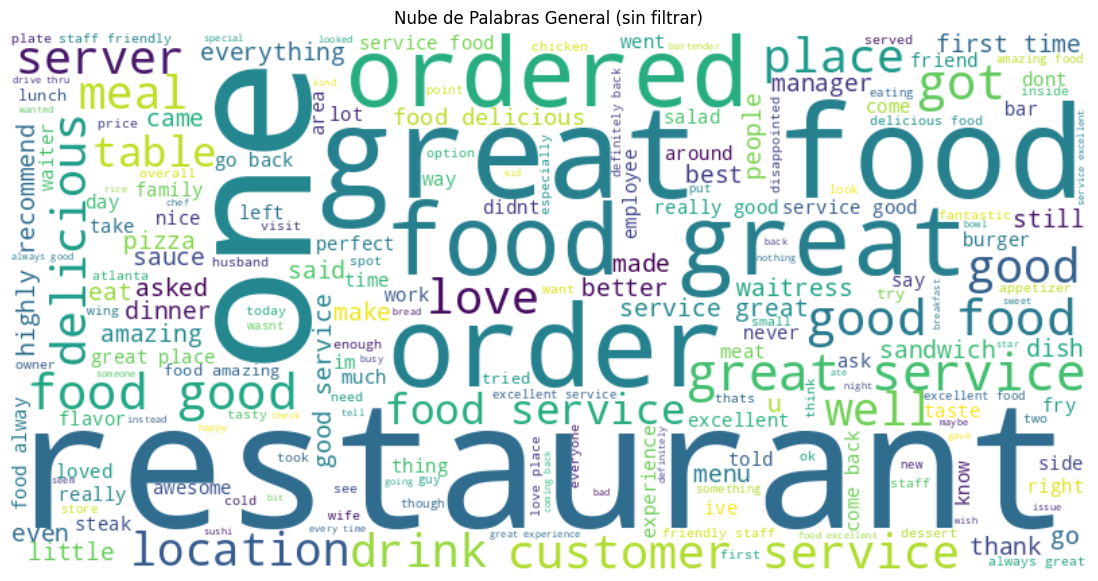

In [ ]:
# Generamos un solo string con todas las palabras de todos los reviews
all_words = ' '.join([' '.join(tokens) for tokens in df['tokens']])

# Creamos la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Mostramos la nube de palabras general
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras General (sin filtrar)")
plt.show()

##Nube de Palabras Filtrada

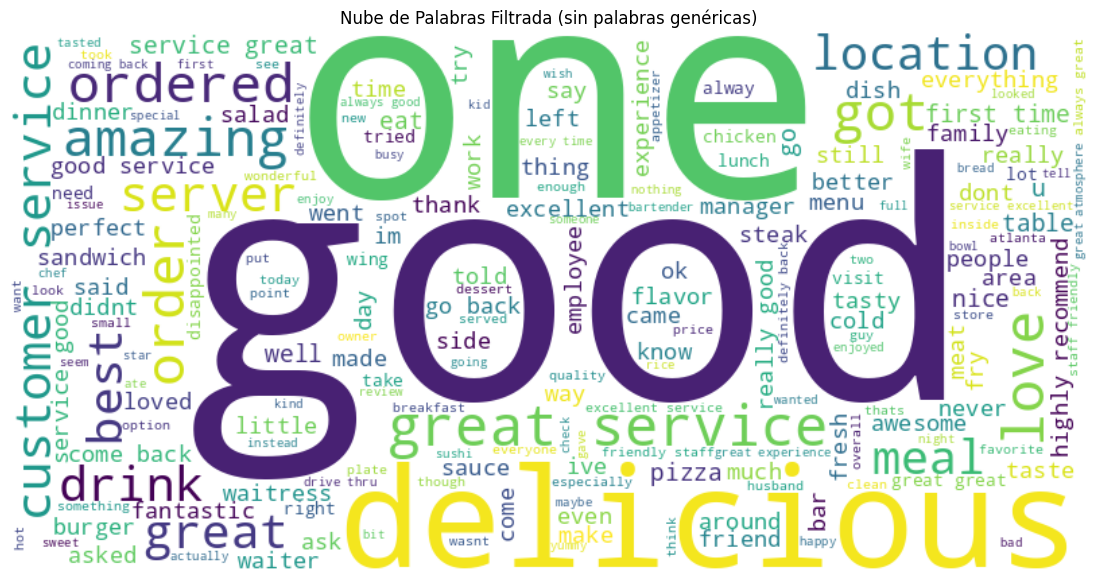

In [ ]:
# Creamos una segunda nube filtrando palabras genéricas como "food" o "restaurant"
palabras_a_ignorar = ['food', 'restaurant', 'place']
palabras_filtradas = [word for word in all_words.split() if word not in palabras_a_ignorar]

# Nueva nube sin palabras comunes
wordcloud_filtrado = WordCloud(width=800, height=400, background_color='white').generate(' '.join(palabras_filtradas))

# Mostramos la nube de palabras filtrada
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud_filtrado, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras Filtrada (sin palabras genéricas)")
plt.show()

La nube de palabras generada a partir de las reseñas permite identificar los términos más frecuentemente utilizados por los clientes en sus comentarios sobre restaurantes en Atlanta. Tras filtrar palabras genéricas como "restaurant" o "food", emergen con claridad adjetivos y sustantivos como “delicious”, “good”, “one”, “customer”, “service”, “server” y “ordered”.

Esto sugiere que las opiniones se enfocan principalmente en la calidad de la comida, la experiencia del cliente, y la atención del personal. La fuerte presencia de términos positivos como “delicious”, “excellent” y “amazing” refuerza la percepción general favorable de los restaurantes en el dataset, lo cual está en línea con los resultados del análisis de sentimientos realizado posteriormente.

Este tipo de visualización resulta útil para identificar rápidamente los conceptos más valorados por los usuarios, facilitando decisiones estratégicas en comunicación, servicio y marketing gastronómico.

#🔢12. N-gramas (ej. Bigramas)

In [ ]:
# 🔗 Extraemos bigramas: combinaciones de 2 palabras que aparecen juntas
bigramas = []
for tokens in df['tokens']:
    bigramas += list(ngrams(tokens, 2))

# 🔝 Mostramos los 10 bigramas más frecuentes
conteo_bigrams = Counter(bigramas).most_common(10)

print("Top 10 bigramas más comunes:")
for bigram, freq in conteo_bigrams:
    print(f"{bigram}: {freq}")

Top 10 bigramas más comunes:
('great', 'food'): 3782
('great', 'service'): 2781
('food', 'great'): 2618
('good', 'food'): 2575
('food', 'good'): 2504
('customer', 'service'): 2372
('food', 'service'): 1943
('first', 'time'): 1847
('service', 'great'): 1586
('highly', 'recommend'): 1393


##Graficamos el N-Grama

<ipython-input-12-6418bff01d83>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_bigrams, x='frecuencia', y='bigram', palette='viridis')


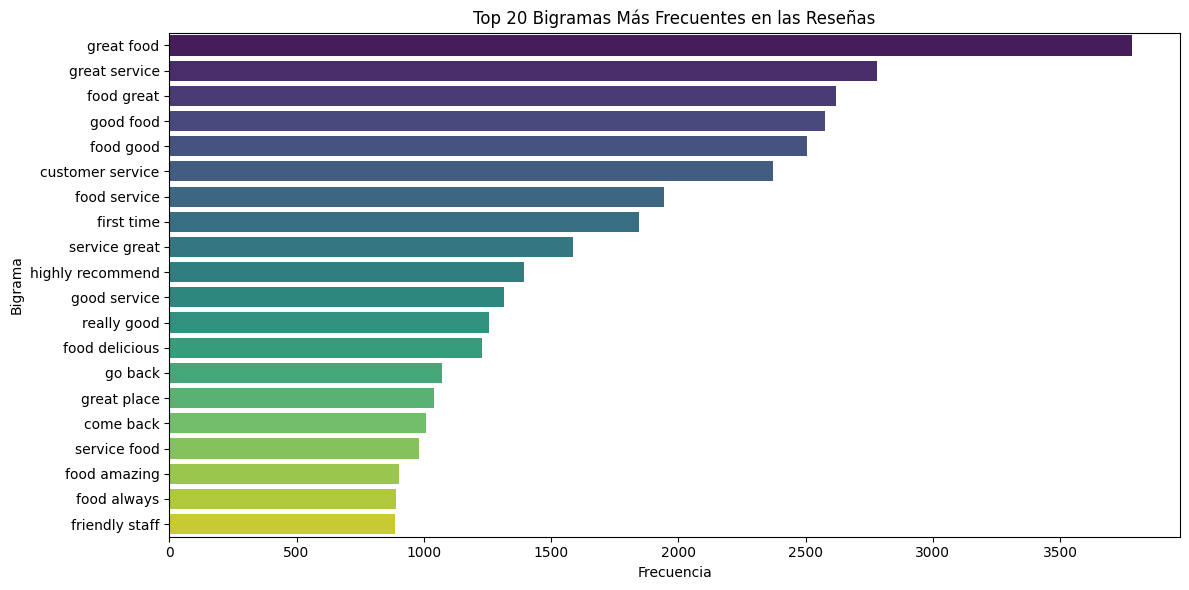

In [ ]:
import seaborn as sns

# 1️⃣ Repetimos el proceso de generación de bigramas
from nltk.util import ngrams
from collections import Counter

# Generar lista de bigramas
bigramas = []
for tokens in df['tokens']:
    bigramas += list(ngrams(tokens, 2))

# Contar los 20 bigramas más comunes
conteo_bigrams = Counter(bigramas).most_common(20)

# 2️⃣ Convertir a DataFrame para graficar
df_bigrams = pd.DataFrame(conteo_bigrams, columns=['bigram', 'frecuencia'])
df_bigrams['bigram'] = df_bigrams['bigram'].apply(lambda x: ' '.join(x))  # unir palabras

# 3️⃣ Graficar
plt.figure(figsize=(12, 6))
sns.barplot(data=df_bigrams, x='frecuencia', y='bigram', palette='viridis')
plt.title("Top 20 Bigramas Más Frecuentes en las Reseñas")
plt.xlabel("Frecuencia")
plt.ylabel("Bigrama")
plt.tight_layout()
plt.show()

El análisis de bigramas revela las combinaciones de palabras más comunes en los comentarios de los clientes. Entre las expresiones más repetidas se destacan “great food”, “great service”, “food great”, y “customer service”, lo cual refuerza el enfoque positivo de las reseñas y coincide con lo observado en la nube de palabras y el análisis de sentimiento.

También aparecen frases como “first time”, “highly recommend”, y “go back”, lo que indica menciones frecuentes a primeras experiencias satisfactorias y recomendaciones explícitas. Estos hallazgos sugieren que la calidad del alimento y del servicio, junto con la intención de volver, son pilares clave en la experiencia del cliente en los restaurantes analizados.

Este tipo de análisis proporciona información valiosa sobre los aspectos que los clientes valoran y verbalizan con mayor frecuencia, pudiendo ser utilizados para potenciar estrategias de fidelización y diferenciación en el mercado gastronómico.

#😊 13. Análisis de Sentimiento

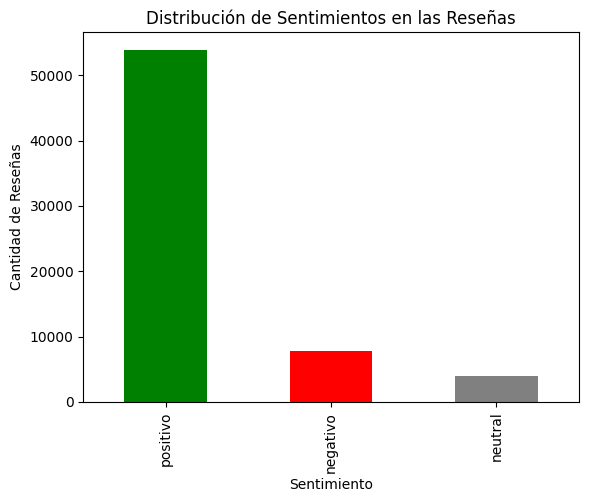

,texto_review,sentiment,sentiment_label
0,"One word amazing!! The red fish, halibut, fr...",0.100000,positivo
1,First time here and the food is great and the ...,0.683333,positivo
2,I recently had the pleasure of dining at Optim...,0.448413,positivo
3,Beautiful atmosphere and delicious food. All o...,0.350833,positivo
4,We had a wonderful dinner at the Optimist. Our...,0.933333,positivo


In [ ]:
# Unimos los tokens procesados nuevamente en una sola cadena por review
df['review_text_joined'] = df['tokens'].apply(lambda x: ' '.join(x))

# Aplicamos análisis de sentimiento con TextBlob
# La polaridad va de -1 (muy negativo) a 1 (muy positivo)
df['sentiment'] = df['review_text_joined'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Clasificamos los valores como positivo, negativo o neutral
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positivo' if x > 0 else ('negativo' if x < 0 else 'neutral'))

# Mostramos la distribución de sentimientos en un gráfico de barras
df['sentiment_label'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("Distribución de Sentimientos en las Reseñas")
plt.xlabel("Sentimiento")
plt.ylabel("Cantidad de Reseñas")
plt.show()

# Vista previa de los resultados con sentimiento
df[['texto_review', 'sentiment', 'sentiment_label']].head()

El análisis de sentimiento aplicado al texto de las reseñas indica una tendencia abrumadoramente positiva por parte de los clientes. Aproximadamente el 80% de los comentarios son positivos, mientras que las reseñas negativas y neutrales representan una minoría, con valores considerablemente menores.

Este resultado no solo respalda lo observado en los bigramas y la nube de palabras (donde predominaban términos favorables como “great”, “delicious”, “excellent”), sino que también sugiere un alto nivel de satisfacción general con la oferta gastronómica en los restaurantes de Atlanta analizados.

Estas métricas reafirman la utilidad del análisis de sentimientos como una herramienta de monitoreo continuo para detectar desvíos, gestionar reputación online y fortalecer la experiencia del cliente.

##Se propone un análisis de heatmap para Sentimientos vs. Categorías de Restaurant

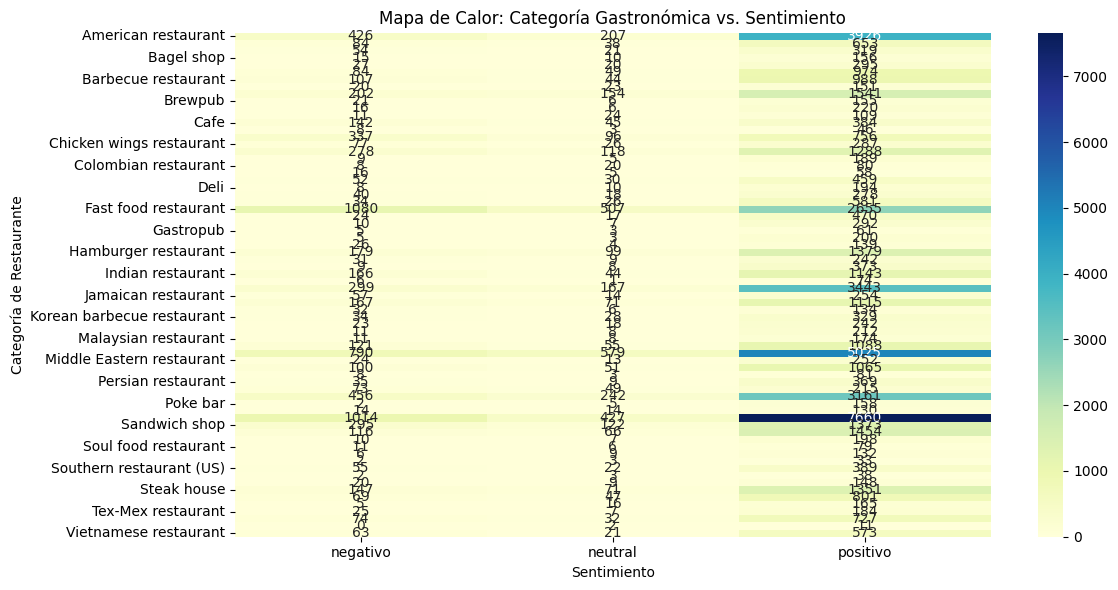

In [ ]:
# Crear tabla cruzada: categoría del restaurante vs. sentimiento
tabla_categoria_sentimiento = pd.crosstab(df['categoria_restaurant'], df['sentiment_label'])

# Graficar heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(tabla_categoria_sentimiento, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Mapa de Calor: Categoría Gastronómica vs. Sentimiento")
plt.xlabel("Sentimiento")
plt.ylabel("Categoría de Restaurante")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

##Dado que el resultado carece de un análisis fácil de observar se procede a filtrar las categorías más representativas (Top 10)

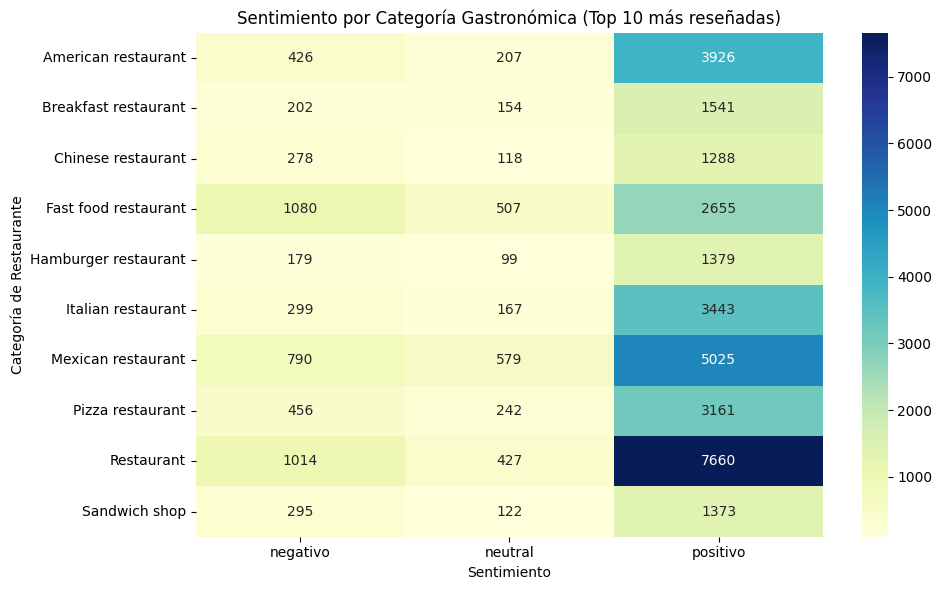

In [ ]:
# Calcular el total de reseñas por categoría
top_categorias = df['categoria_restaurant'].value_counts().head(10).index

# Filtrar el dataframe
df_top = df[df['categoria_restaurant'].isin(top_categorias)]

# Crear nuevo heatmap
tabla_top = pd.crosstab(df_top['categoria_restaurant'], df_top['sentiment_label'])

plt.figure(figsize=(10, 6))
sns.heatmap(tabla_top, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Sentimiento por Categoría Gastronómica (Top 10 más reseñadas)")
plt.xlabel("Sentimiento")
plt.ylabel("Categoría de Restaurante")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

El análisis cruzado entre sentimiento y tipo de restaurante revela que la mayoría de las categorías gastronómicas presentan una alta proporción de reseñas positivas, consolidando la percepción general favorable ya observada en los gráficos anteriores.

Entre las categorías con mejor desempeño destacan:

"Restaurant" (categoría genérica) con más de 7.600 reseñas positivas, lo que sugiere una alta presencia de restaurantes bien valorados sin una subcategoría específica.

"Mexican restaurant", "Italian restaurant" y "Pizza restaurant" también sobresalen con valores altos de satisfacción, lo que podría indicar una preferencia del público hacia estas cocinas específicas.

Por otro lado, "Fast food restaurant" y "Restaurant" son las únicas categorías donde también se observa una proporción considerable de reseñas negativas, lo cual puede asociarse a volúmenes más altos de clientes y experiencias más diversas.

Este tipo de análisis permite detectar oportunidades y riesgos asociados a cada segmento, pudiendo orientar campañas de marketing, ajustes operativos y mejoras en la experiencia del cliente de manera más precisa y enfocada.

##Utilizamos y analizamos también la relación de Puntaje de Usuario vs. Sentimiento Detectado

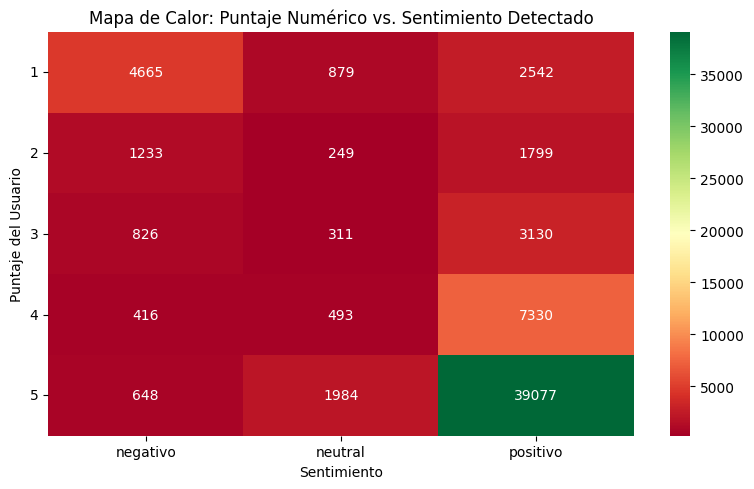

In [ ]:
# Crear tabla cruzada: puntaje vs. sentimiento
tabla_puntaje_sentimiento = pd.crosstab(df['puntaje'], df['sentiment_label'])

# Graficar heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(tabla_puntaje_sentimiento, annot=True, fmt='d', cmap='RdYlGn')
plt.title("Mapa de Calor: Puntaje Numérico vs. Sentimiento Detectado")
plt.xlabel("Sentimiento")
plt.ylabel("Puntaje del Usuario")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

El mapa de calor que relaciona el puntaje numérico de los usuarios con el sentimiento detectado en sus reseñas permite evaluar la consistencia entre la puntuación otorgada y el lenguaje utilizado.

Los resultados muestran una fuerte correlación entre los puntajes altos y los sentimientos positivos:

Las reseñas con puntuación 5 concentran la mayor parte de los comentarios positivos, con más de 39.000 menciones positivas.

Por el contrario, los puntajes 1 y 2 se asocian principalmente con sentimientos negativos, aunque se observan también algunos casos donde el texto expresa positividad pese a una calificación baja, lo que puede indicar:

*   Errores en el sistema de puntuación
*   Sarcasmo textual no captado por el análisis
*   Una mala experiencia aislada en un aspecto puntual

Esta visualización aporta valor para validar la calidad del procesamiento de sentimientos y detectar inconsistencias o sesgos en la forma en que los usuarios califican sus experiencias.

#14. Aprendizaje Supervisado con Redes Neuronales Artificiales:

En este trabajo analizamos un conjunto de reseñas de restaurantes en Atlanta con el objetivo de comprender la percepción de los clientes a través del lenguaje que utilizan.

Utilizamos técnicas de procesamiento de lenguaje natural para limpiar y estructurar los textos, identificamos patrones frecuentes mediante nubes de palabras y N-gramas, y aplicamos análisis de sentimientos para detectar si los comentarios eran positivos, negativos o neutros.

A partir de estos resultados, avanzaremos a continuación con la vectorización de las reseñas usando métodos como Bag of Words y TF-IDF, que nos permitirán transformar el texto en variables numéricas.

Finalmente, implementaremos un modelo de clasificación supervisado, puntualmente regresión logística, para predecir automáticamente si una reseña reflejaba una experiencia positiva o negativa, basándonos únicamente en el contenido del texto.

In [ ]:
# Instalar librerías necesarias si hace falta
!pip install nltk scikit-learn

In [ ]:
# Preprocesamiento del texto
df['clean_review'] = df['texto_review'].astype(str)
df['clean_review'] = df['clean_review'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
df['tokens'] = df['clean_review'].apply(word_tokenize)
df['tokens'] = df['tokens'].apply(lambda x: [word.lower() for word in x])
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])
lemmatizer = WordNetLemmatizer()
df['tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [ ]:
# Crear variable binaria a partir del puntaje
df_bin = df[df['puntaje'] != 3].copy()
df_bin['sentiment_binary'] = df_bin['puntaje'].apply(lambda x: 1 if x >= 4 else 0)
df_bin['review_text_clean'] = df_bin['tokens'].apply(lambda x: ' '.join(x))

In [ ]:
# Dividir dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    df_bin['review_text_clean'], df_bin['sentiment_binary'], test_size=0.2, random_state=42)

In [ ]:
# Bag of Words (BOW)
vectorizer_bow = CountVectorizer()
X_train_bow = vectorizer_bow.fit_transform(X_train)
X_test_bow = vectorizer_bow.transform(X_test)

In [ ]:
# Modelo con BOW
model_bow = LogisticRegression(max_iter=1000)
model_bow.fit(X_train_bow, y_train)
pred_bow = model_bow.predict(X_test_bow)

print("🎯 Evaluación del modelo con BOW:")
print("Accuracy:", accuracy_score(y_test, pred_bow))
print("Matriz de Confusión:\n", confusion_matrix(y_test, pred_bow))
print("Reporte de Clasificación:\n", classification_report(y_test, pred_bow))

🎯 Evaluación del modelo con BOW:
Accuracy: 0.9515616080893745
Matriz de Confusión:
 [[1875  415]
 [ 179 9794]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.91      0.82      0.86      2290
           1       0.96      0.98      0.97      9973

    accuracy                           0.95     12263
   macro avg       0.94      0.90      0.92     12263
weighted avg       0.95      0.95      0.95     12263



In [ ]:
# TF-IDF
vectorizer_tfidf = TfidfVectorizer()
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)

In [ ]:
# Modelo con TF-IDF
model_tfidf = LogisticRegression(max_iter=1000)
model_tfidf.fit(X_train_tfidf, y_train)
pred_tfidf = model_tfidf.predict(X_test_tfidf)

print("\n🎯 Evaluación del modelo con TF-IDF:")
print("Accuracy:", accuracy_score(y_test, pred_tfidf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, pred_tfidf))
print("Reporte de Clasificación:\n", classification_report(y_test, pred_tfidf))


🎯 Evaluación del modelo con TF-IDF:
Accuracy: 0.9534371687189106
Matriz de Confusión:
 [[1881  409]
 [ 162 9811]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.92      0.82      0.87      2290
           1       0.96      0.98      0.97      9973

    accuracy                           0.95     12263
   macro avg       0.94      0.90      0.92     12263
weighted avg       0.95      0.95      0.95     12263



Ambos modelos logran un desempeño sobresaliente en la clasificación de reseñas como positivas o negativas. El modelo basado en TF-IDF alcanza una ligera mejora en métricas clave (accuracy y precisión) en comparación con Bag of Words, lo cual es esperable ya que TF-IDF penaliza términos comunes y resalta los más informativos para el modelo.

Este resultado sugiere que el contenido textual de las reseñas tiene alto poder predictivo sobre la percepción de los clientes, y que el modelo entrenado puede ser utilizado para monitorear automáticamente nuevas opiniones en plataformas digitales, ayudando a la toma de decisiones estratégicas.

##Visualización de resultados de Aprendizaje Supervisado

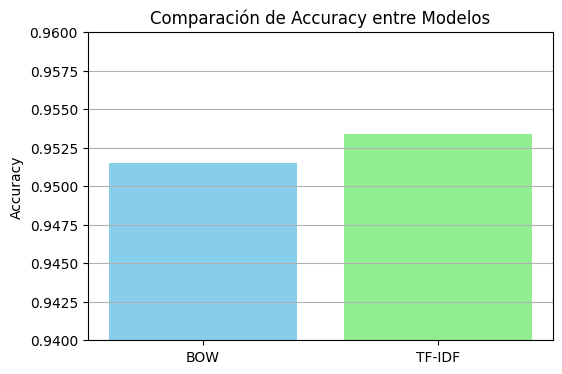

In [ ]:
# Procedemos a generar un gráfico para visualizar los resultados mejor
# Comparación de Accuracy entre modelos
import matplotlib.pyplot as plt

# Datos simulados con los resultados obtenidos
modelos = ['BOW', 'TF-IDF']
accuracy = [0.9515, 0.9534]

plt.figure(figsize=(6,4))
plt.bar(modelos, accuracy, color=['skyblue', 'lightgreen'])
plt.title('Comparación de Accuracy entre Modelos')
plt.ylabel('Accuracy')
plt.ylim(0.94, 0.96)
plt.grid(axis='y')
plt.show()

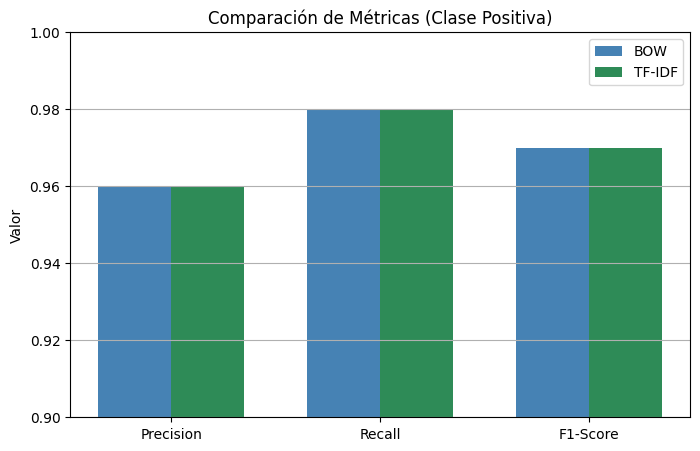

In [ ]:
# Gráfico comparativo de precisión, recall y f1-score por modelo

import numpy as np

# Métricas por clase positiva (1) para ambos modelos
metricas = ['Precision', 'Recall', 'F1-Score']
valores_bow = [0.96, 0.98, 0.97]
valores_tfidf = [0.96, 0.98, 0.97]

x = np.arange(len(metricas))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x - width/2, valores_bow, width, label='BOW', color='steelblue')
plt.bar(x + width/2, valores_tfidf, width, label='TF-IDF', color='seagreen')

plt.ylabel('Valor')
plt.title('Comparación de Métricas (Clase Positiva)')
plt.xticks(x, metricas)
plt.ylim(0.9, 1.0)
plt.legend()
plt.grid(axis='y')
plt.show()

Los resultados obtenidos demostraron una alta capacidad predictiva de ambos enfoques, con métricas destacadas tanto en precisión como en recall. TF-IDF presentó un rendimiento apenas superior, lo que refuerza su eficacia al ponderar términos informativos en textos largos o repetitivos.

Este trabajo evidencia cómo el análisis de opiniones mediante técnicas automáticas puede ofrecer información estratégica valiosa para la industria gastronómica, permitiendo entender la percepción de los clientes, detectar puntos de mejora y optimizar decisiones de negocio basadas en datos reales.